# Erkennung von Ziffern

Das Erkennen von Ziffern hat in dem Bereich Maschinelles Lernen Traidition.
Anbei werden die Ziffern klassifziert, die mit scikit-learn bereits mit ausgeliefert werden.

In [1]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

Zunächst wird der Datensatz mit den Ziffern geladen.

In [2]:
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

## Darstellung einer Ziffer

Nun wird exemplarisch die 22te Ziffer des Datensatzes dargestellt.

In [3]:
digits.images[22]

array([[ 0.,  0.,  8., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  1., 13., 11., 16.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  0., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  3.,  1., 16.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0., 14., 15.,  8.,  8.,  3.,  0.],
       [ 0.,  0.,  7., 12., 12., 12., 13.,  1.]])

Die Pixel werden anscheinend als Fließkommazahlen zwischen 0 und 16 dargestellt, wobei die Nachkommastellen nicht genutzt werden.
Eine Ziffer wird außerdem durch eine $8 \times 8$-Matrix repräsentiert.

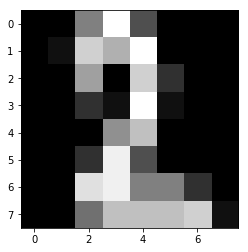

In [4]:
plt.imshow(digits.images[22], cmap="gray")
plt.show()

Es handelt sich scheinbar um eine 2, wobei 0 als schwarz und 16 als weiß dargestellt wird.
Dies können wir über das Array `digits.target` überprüfen.

In [5]:
digits.target[22]

2

Dies bestätigt, die oben dargestellte Ziffer eine 2 ist.

Eine alternative, uns eher geläufige Darstellung ist schwarz auf weiß.
Dafür können wir die Intensitätswerte einfach "umdrehen".

In [6]:
inverted = 16 - digits.images[22]
inverted

array([[16., 16.,  8.,  0., 11., 16., 16., 16.],
       [16., 15.,  3.,  5.,  0., 16., 16., 16.],
       [16., 16.,  6., 16.,  3., 13., 16., 16.],
       [16., 16., 13., 15.,  0., 15., 16., 16.],
       [16., 16., 16.,  7.,  4., 16., 16., 16.],
       [16., 16., 13.,  1., 11., 16., 16., 16.],
       [16., 16.,  2.,  1.,  8.,  8., 13., 16.],
       [16., 16.,  9.,  4.,  4.,  4.,  3., 15.]])

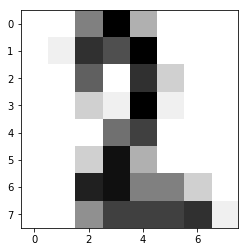

In [7]:
plt.imshow(inverted, cmap="gray")
plt.show()

Dieser Schritt ist aber für den Menschen eher interessant und für weniger für das Maschinelle Lernen.

Eine Möglichkeit, Ziffern zu analysieren, ist, einfach jeden Pixel wie ein eigenes Attribut zu behandeln.
Beim Aufruf von `flatten` werden die Reihen der Matrix aneinandergehängt, vgl. die [numpy-Dokumentation](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.flatten.html)

In [8]:
flattened = digits.images[22].flatten()
flattened

array([ 0.,  0.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  1., 13., 11., 16.,
        0.,  0.,  0.,  0.,  0., 10.,  0., 13.,  3.,  0.,  0.,  0.,  0.,
        3.,  1., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,
        0.,  0.,  0.,  3., 15.,  5.,  0.,  0.,  0.,  0.,  0., 14., 15.,
        8.,  8.,  3.,  0.,  0.,  0.,  7., 12., 12., 12., 13.,  1.])

Hier sind nun einfach alle Pixel aneinander gehängt worden.
So nimmt ein Bild nur eine Zeile ein.

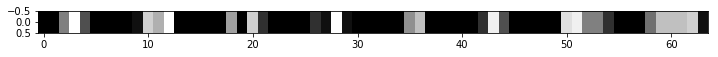

In [9]:
fig, ax = plt.subplots(figsize=(12, .4))
ax.imshow(np.expand_dims(flattened, axis=0), cmap="gray", aspect="auto")
plt.show()

## Vorverarbeitung der Bilder

Die Methode `flatten` erstellt aus einer 2d-Matrix einen 1d-Vektor.
Eine grafische Repräsentation dieses Formats ist oben zu sehen.
Dies ist notwendig, weil die bislang vorgestellten Klassifizierungs-Algorithmen nur einfache Attribute verstehen - die räumliche Nähe der Pixel kann von SVMs, Feedforward-NNs oder RandomForests so, wie sie bislang definiert worden sind, nicht ausgewertet werden.
Bei diesem Vorverarbeitungs-Schritt geht die Information über die räumliche Nähe im 2d-Bild verloren.

In [10]:
images = [image.flatten() for image in digits.images]

Nun liegt die Eingabe so vor, dass damit wie bislang auch verfahren werden kann.
Die Kategorie ist in `digits.target` vermerkt.
Also `digits.images[22]` ist das Bild und in `digits.target[22]` steht dann, dass es sich bei dem Bild um eine Zwei handelt.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(images, digits.target, test_size=0.33, random_state=42)

clf = RandomForestClassifier(
    n_estimators=10,
    max_depth=7,
    n_jobs=-1,
    max_features="auto",
    class_weight=None
)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("The accuracy reached {acc} %".format(acc=accuracy * 100))

The accuracy reached 92.25589225589226 %


Nun lasssen wir uns eine Konfusionsmatrix anzeigen.
Damit kann man sehen, welche Ziffern mit welchen anderen Ziffern am häufigsten vertauscht worden sind.

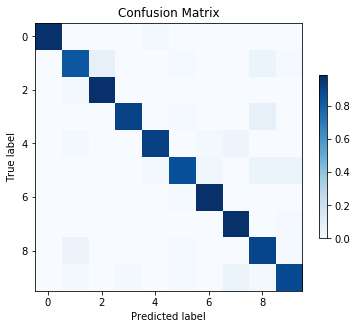

In [12]:
predicted = clf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(
    y_test,
    predicted
)
normalized_confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:,]
    
fig, ax = plt.subplots(figsize=(6, 6))
img = ax.imshow(normalized_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar(img, shrink=0.5)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Eigentlich ist die Vorhersage relativ gut: 
*Predicted label* und *True label* stimmen ganz gut überein.
Man sieht nur, dass Fünfen häufiger für eine Neun gehalten worden sind (in der Mitte rechts)
und dass Achten häufiger für eine Zwei gehalten worden sind (unten links).

Die Literatur zur Erkennung von Ziffern ist sehr umfangreich, ein Startpunkt ist bspw. die Webseite http://yann.lecun.com/exdb/mnist/